In [1]:
import matplotlib.pyplot as plt
import numpy as np


In [2]:
train3=np.load('Classification/trainacc_3lay_180320.npy')
test3=np.load('Classification/testacc_3lay_180320.npy')
train2=np.load('Classification/trainacc_2lay_180320.npy')
test2=np.load('Classification/testacc_2lay_180320.npy')

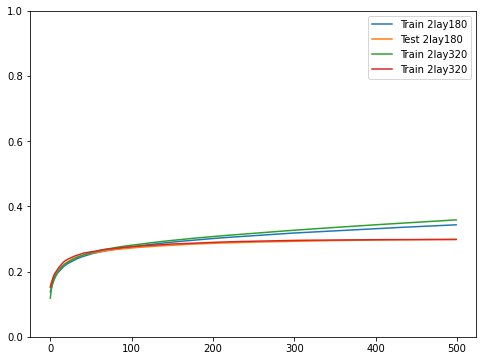

In [14]:
plt.figure(figsize=(8,6))
x=[i for i in range(len(train2[0]))]
plt.ylim(0,1)
plt.plot(x,train2[0],label='Train 2lay180')
plt.plot(x,test2[0],label='Test 2lay180')
plt.plot(x,train2[1],label='Train 2lay320')
plt.plot(x,test2[1],label='Train 2lay320')

plt.legend()
plt.show()

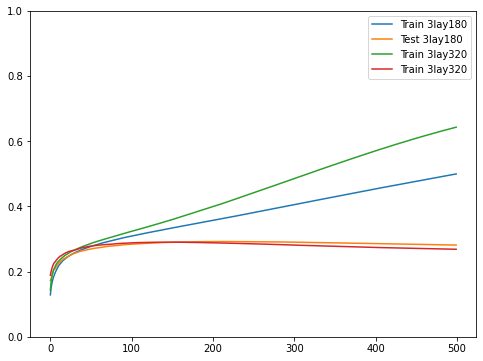

In [16]:
plt.figure(figsize=(8,6))
x=[i for i in range(len(train2[0]))]
plt.ylim(0,1)

plt.plot(x,train3[0],label='Train 3lay180')
plt.plot(x,test3[0],label='Test 3lay180')
plt.plot(x,train3[1],label='Train 3lay320')
plt.plot(x,test3[1],label='Train 3lay320')

plt.legend()
plt.show()

IndexError: index 2 is out of bounds for axis 0 with size 2

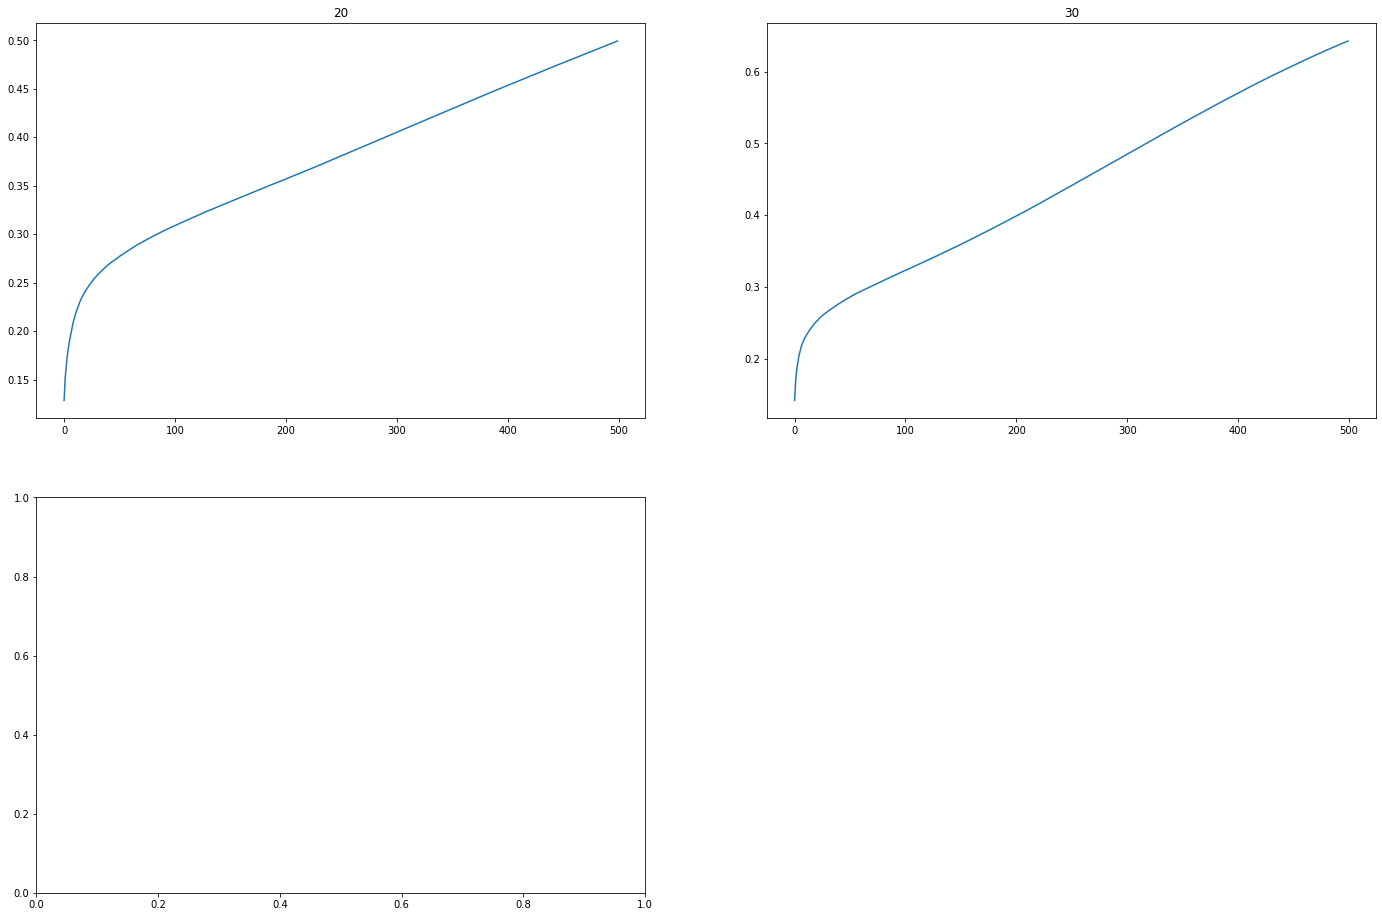

In [14]:
clay=[20,30,40,80]
plt.figure(figsize=(12*2,8*2))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.plot(range(len(train[0])),train[i])
    plt.title(str(clay[i]))
plt.show()

IndexError: index 2 is out of bounds for axis 0 with size 2

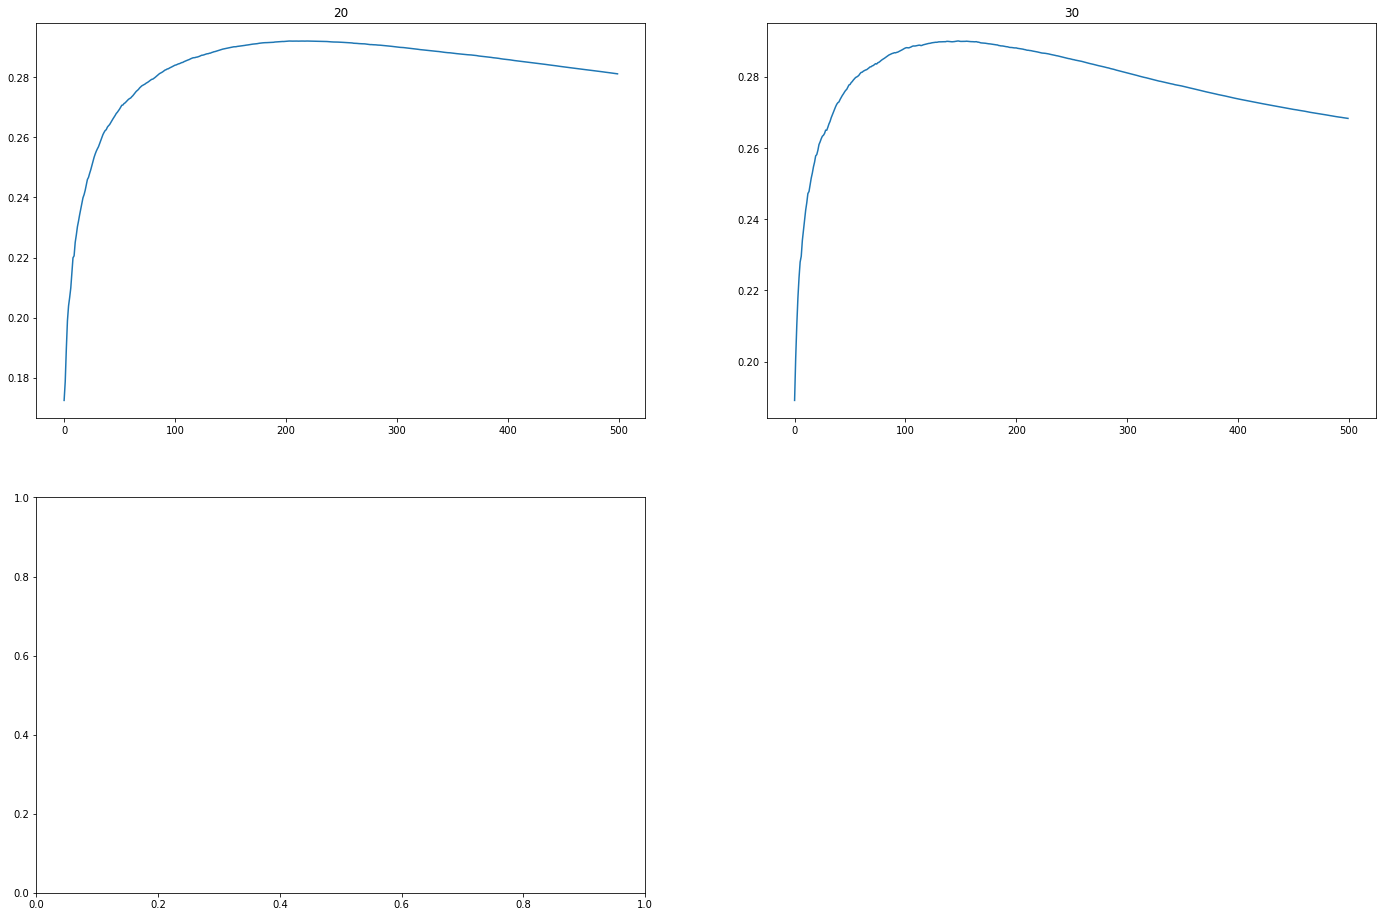

In [16]:
clay=[20,30,40,80]
plt.figure(figsize=(12*2,8*2))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.plot(range(len(train[0])),test[i])
    plt.title(str(clay[i]))
plt.show()